In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import seaborn as sns


# Tasks: Preprocessing and EDA Steps

## Step 1: Load the Data
* Import the necessary libraries (pandas, numpy, matplotlib, seaborn).
*  Load the dataset into a pandas DataFrame using pd.read_csv() or from the provided file
* • Display the first few rows using .head() to understand the structure.

In [3]:
df = pd.read_csv("gym_members_exercise_tracking_synthetic_data.csv")
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83


## Step 2: Inspect the Data
1. Shape: Use .shape to check the number of rows and columns.
2. Columns: Use .columns to list column names.
3. Info: Use .info() to examine data types and non-null counts for each column.
4. Description: Use .describe() to summarize numeric columns (mean, min, max, etc.). 

In [3]:
print("Shape of DataFrame: ", df.shape)
print("--------------------------------------------")
print("List of Columns:\n", df.columns)
print("--------------------------------------------")
print("Data info: \n", df.info())
print("--------------------------------------------")
print("Data Description:\n", df.describe())

Shape of DataFrame:  (1800, 15)
--------------------------------------------
List of Columns:
 Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1790 non-null   float64
 1   Gender                         1729 non-null   object 
 2   Weight (kg)                    1778 non-null   float64
 3   Height (m)                     1774 non-null   float64
 4   Max_BPM                        1779 non-null   object 
 5   Avg_BPM                     

In [4]:
#Max_BPM is wrongly classified as object dtype when it should be numeric, so handle it
df['Max_BPM'] = pd.to_numeric(df['Max_BPM'], errors='coerce')
print("Datat Type of Max_BPM: ", df['Max_BPM'].dtype)

Datat Type of Max_BPM:  float64


## Step 3: Identify and Handle Missing Values
1. Use .isnull().sum() to check the number of missing values per column.
2. Visualize missing data using a heatmap (sns.heatmap) to identify patterns.
3. Handle missing value
    * **Age, Weight, Height, and Numeric Columns**
      - Impute missing values using the mean or median
    * **Gender and Workout_Type**
      - Impute missing values using the mode (most frequent value)
    * Document and justify your imputation strategyrategy.

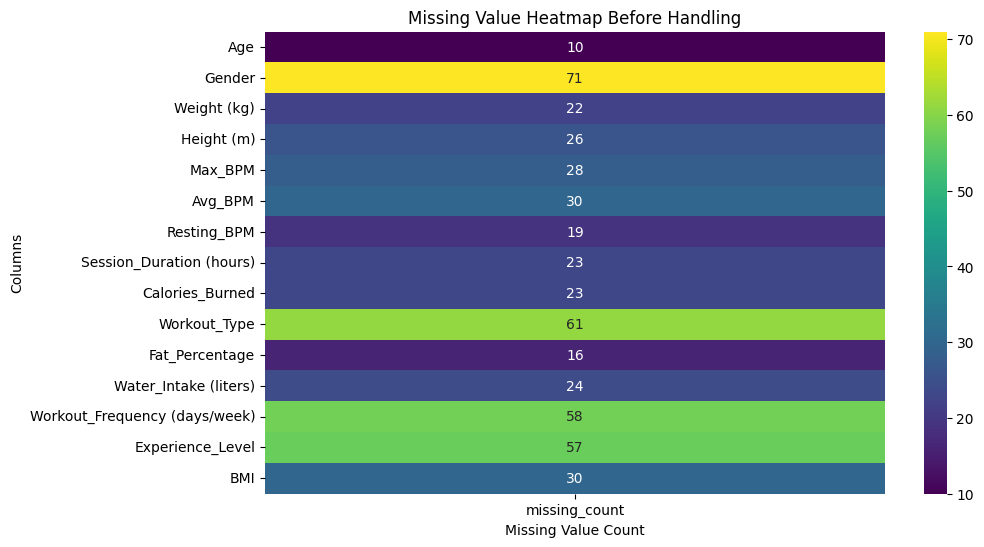

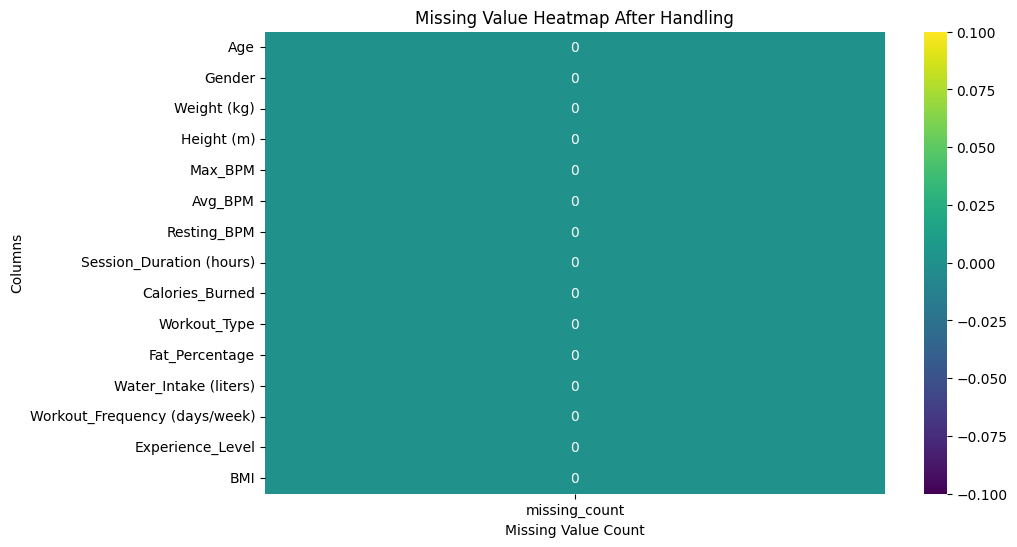

In [5]:
missing_values = df.isnull().sum()

missing_df = pd.DataFrame({'missing_count': missing_values})

plt.pyplot.figure(figsize=(10, 6))
sns.heatmap(missing_df, annot=True, fmt='d', cmap='viridis')
plt.pyplot.title('Missing Value Heatmap Before Handling')
plt.pyplot.ylabel('Columns')
plt.pyplot.xlabel('Missing Value Count')
plt.pyplot.show()

if not missing_values.empty:
    numeric_cols = df.select_dtypes(include=np.number).columns
    for column in numeric_cols:
        df.fillna({column: df[column].mean()}, inplace=True)
    df.fillna({'Gender': df['Gender'].mode().iloc[0], 'Workout_Type': df['Workout_Type'].mode().iloc[0]}, inplace=True)

missing_values = df.isnull().sum()

missing_df = pd.DataFrame({'missing_count': missing_values})

plt.pyplot.figure(figsize=(10, 6))
sns.heatmap(missing_df, annot=True, fmt='d', cmap='viridis')
plt.pyplot.title('Missing Value Heatmap After Handling')
plt.pyplot.ylabel('Columns')
plt.pyplot.xlabel('Missing Value Count')
plt.pyplot.show()

### Justification:

#### Numeric Columns:
* **Mean Imputation:**
  - Suitable for normally distributed data without significant outliers.
  - It preserves the overall distribution of the data.
* **Median Imputation:**
  - More robust to outliers.
  - It's a better choice when the data is skewed or has extreme values.
#### Categorical Columns:
* **Mode Imputation:**
  - It replaces missing values with the most frequent category, which is a reasonable approach for categorical data.

## Step 4: Check for Duplicates
1. Use .duplicated().sum() to check for duplicate rows.
2. Remove duplicates, if any, using .drop_duplicates().

In [6]:
print("Duplicate Rows before removing: ", df.duplicated().sum())
df.drop_duplicates()
print("Duplicate Rows after removing: ", df.duplicated().sum())

Duplicate Rows before removing:  0
Duplicate Rows after removing:  0


## Step 5: Validate Data
1. Numeric Columns:
   * Check for invalid entries (e.g., special characters like ? in Max_BPM).
   * Convert columns like Max_BPM to numeric using pd.to_numeric() with errors='coerce'.
   * Replace invalid values with NaN and impute as needed.
2. Categorical Columns:
   * Use .unique() to check for inconsistencies in Gender, Workout_Type, etc.
   * Standardize inconsistent values (e.g., Male, M → Male).

In [7]:
#Numerical inconsistency already handled above
print("Unique Values in column Gender: ", df['Gender'].unique())
print("Unique Values in column Workout_Type: ", df['Workout_Type'].unique())
df['Workout_Type'] = df['Workout_Type'].str.replace('\\n', '', regex=False)
df['Workout_Type'] = df['Workout_Type'].str.replace('\\t', '', regex=False)
print("Unique Values in column Workout_Type after standardizing: ", df['Workout_Type'].unique())

Unique Values in column Gender:  ['Female' 'Male']
Unique Values in column Workout_Type:  ['Strength' 'Cardio' 'HIIT' 'Yoga' '\\nStrength' '\\tCardio' '\\tYoga']
Unique Values in column Workout_Type after standardizing:  ['Strength' 'Cardio' 'HIIT' 'Yoga']


## Step 6: Create New Features
1. BMI Validation:
   * Verify if the BMI column is consistent with the formula:

     BMI = weight (kg) / height² (m²)
   * Recalculate BMI where inconsistencies are found.
2. . Workout Intensi:
   * Create a new column: Workout_Intensity = Avg_BPM / Max_BPM